# **THE SPARKS FOUNDATION GRIP PROGRAM**
## Data Science and Business Analytics Internship #GRIPAPR21

##**Task 2 : Prediction using Unsupervised ML**
### Intern : Ketaki Patil

- From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

###**Import Libraries and Read data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


###**Data Wrangling**

In [ ]:
del df['Id']

In [ ]:
del df['Species']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


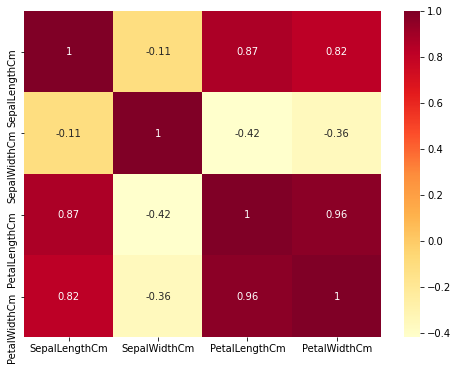

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap="YlOrRd")

In [ ]:
x = df.iloc[:,:].values

### **Elbow method to find optimum clusters**

In [ ]:
from sklearn.cluster import KMeans

k_range = range(1,11)

wcss = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(x)
    wcss.append(km.inertia_)
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.56163015873016,
 38.930963049671746,
 34.1967910993998,
 29.87991975437056,
 28.170474226066336,
 26.195639032536093]

Text(0.5, 1.0, 'Elbow Method')

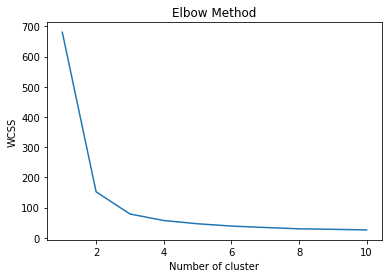

In [ ]:
plt.plot(k_range,wcss)
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.title('Elbow Method')

- The optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

- So, we choose the number of clusters as '3'.

### **Training Kmeans Model**

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### **Visualizing the clusters**

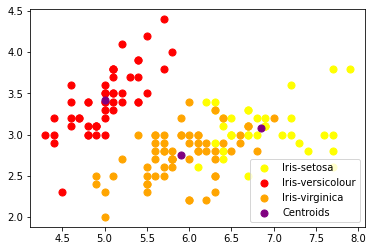

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'orange', label = 'Iris-virginica')

center = kmeans.cluster_centers_
plt.scatter(center[:, 0], center[:, 1], s = 50, c = 'purple', label = 'Centroids')

plt.legend()